#Tf-Idf Implementation for the Hotel Reviews Dataset

This Notebook implements the tf-idf method which helps in providing the importance of every word in a sentence or a document. Tf-Idf helps in evaluating the frequency of a word and therefore helps in understanding which words are adding meaning to the document and others, which are of less importance. 

In [0]:
import pandas as pd
import csv
import nltk
nltk.download("popular")                                    #downloads the 'popular' packages under NLTK library
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [0]:
#This block imports the datset from the github profile, it can be modifed to upload a local file or from a different github profile
url="https://raw.githubusercontent.com/Aditi2806/hotel_review_analysis/master/Hotel%20Reviews%20Dataset.csv"

dataframe=pd.read_csv(url,index_col="Hotel Name",encoding="utf-8")              #converts the imported dataset CSV to a usable pandas datframe

The Daffodils Connaught Place


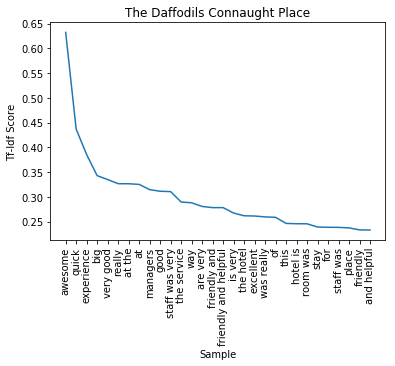

Trend Nights Inn


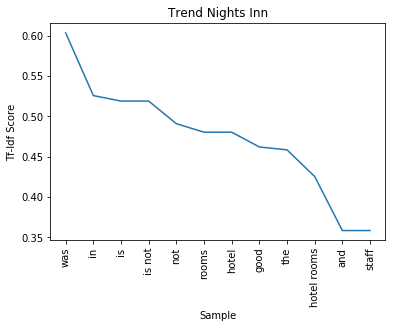

Olivia Suite New Delhi Airport


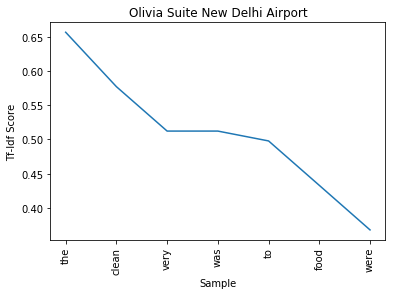

Conclave Comfort East Of Kailash


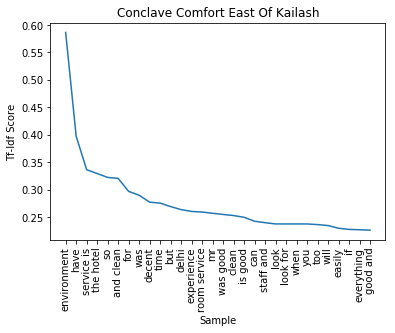

Trend Natraj Yes Please Paharganj


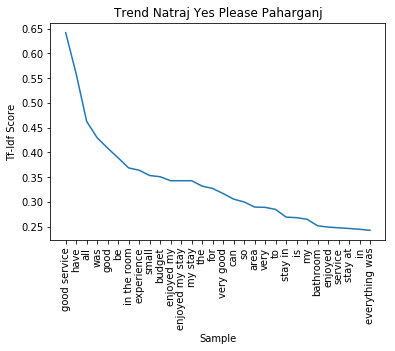

Namaste BnB Hauz Khas


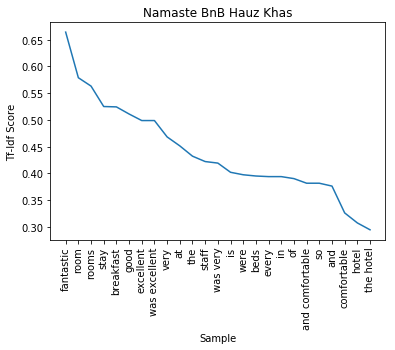

Trend Excellent


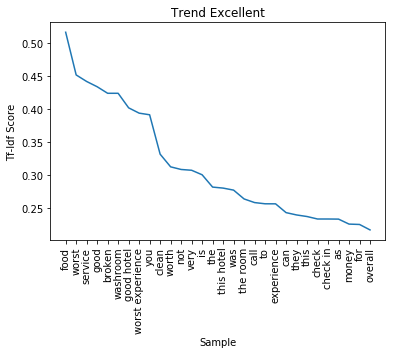

South View Nehru Place


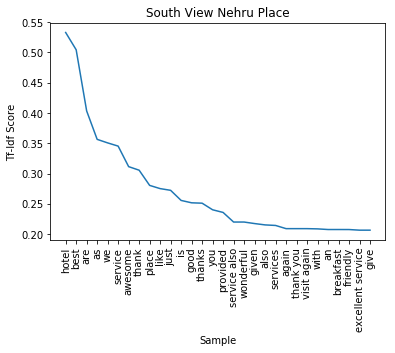

Sumedha Premium Greater Kailash


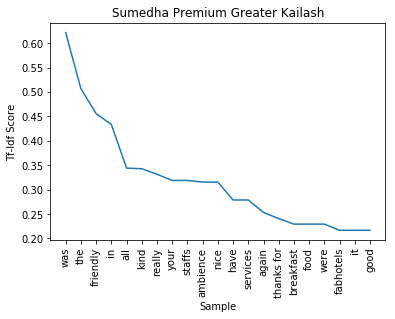

Aaron Castle Safdarjung Hospital


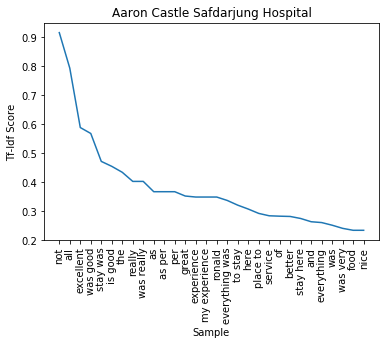

Park Inn by Radisson New Delhi IP Extension


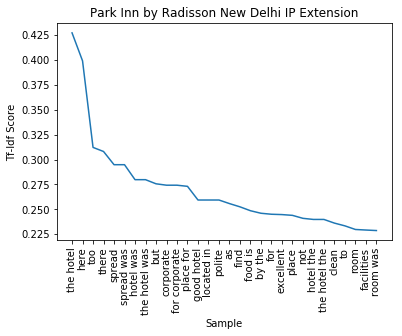

Imperial Villa Lajpat Nagar


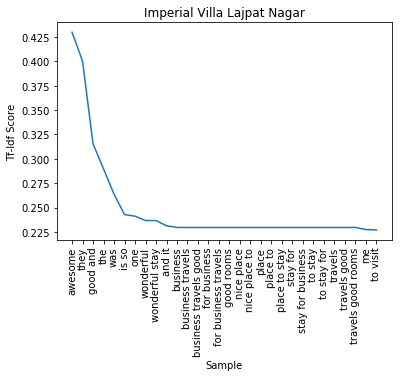

Prime Shervani Pragati Maidan


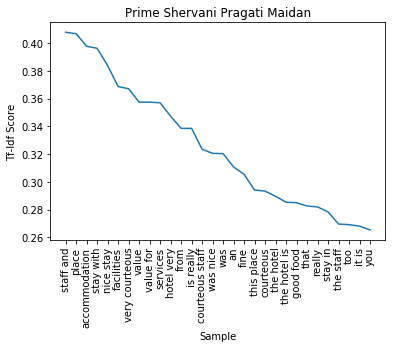

Trend GRD Inn Kalkaji


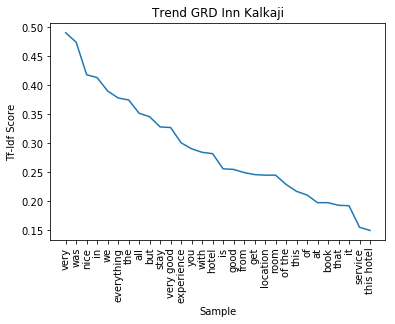

Hilton Garden Inn New Delhi Saket


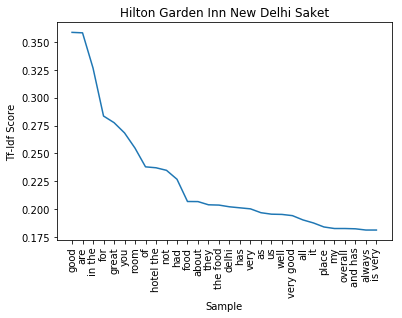

In [0]:
hotel_name=set([i for i in dataframe.index])                    #list for storing distinct hotel names

for row in hotel_name:                                          #iterating through every review of a particular hotel
    word_list_tfidf=[]                                          #list to store all the reviews for a hotel
    unique_words={}                                             #dictionary that keeps the unique words in reviews as 'keys' and its average tf-idf score as its 'value'
    
    tfidf=TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,3))    #initializing the tf-idf vectorizer that will calculate the tf-idf score and also creates n-grams uptill trigrams

    for j in dataframe['Review'][row]:                          #iterates through each review of the hotel and appends to words_list_tfidf 
        word_list_tfidf.append(j)

    print(row)

    features=tfidf.fit_transform(word_list_tfidf)               #calculates the tf-idf score
    tfidf_data=pd.DataFrame(features.toarray(),columns=tfidf.get_feature_names())       #convert the sparse matrix into a usable dataframe

    #this part of the program is used for visualization of words according to their tf-idf score
    '''tf-idf gives a score to every word according to their presence in every sentence of the document, 
    therefore, to calculate the score according to the complete document, 
    we take the average of tf-idf scores for that word and store it in a dictionary format'''
    for i in tfidf_data.index:
        for x,y in zip(tfidf_data.iloc[i,:],tfidf.get_feature_names()):         #
            if x!=0:
                if y in unique_words.keys():
                    unique_words[y]=(unique_words[y]+x)/2
                else:
                    unique_words[y]=x
    
    sorted_unique_words= sorted(unique_words.items(), key=lambda kv: kv[1], reverse=True)
    x,y= (zip(*sorted_unique_words))
    x=x[:30]
    y=y[:30]
    plt.plot(x,y)
    plt.xticks(x,x,rotation='vertical')
    plt.xlabel('Sample')
    plt.ylabel('Tf-Idf Score')
    plt.title(row)
    plt.show()